## Using inbuilt KNN Classifier 

In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
dataset = datasets.load_breast_cancer()
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset.data, dataset.target, test_size = 0.2, random_state = 0)

In [4]:
clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [5]:
clf.score(X_test, Y_test)  # No of neighbors(k) = 5

0.9473684210526315

## Using Cross Validation to find best value of neighbors(K)

In [6]:
# Using cross_validation to find best value of k
y_axis = []
for i in range(1,26, 2):
    clf = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(clf, X_train, Y_train, cv = KFold(n_splits = 3))
    y_axis.append(scores.mean())

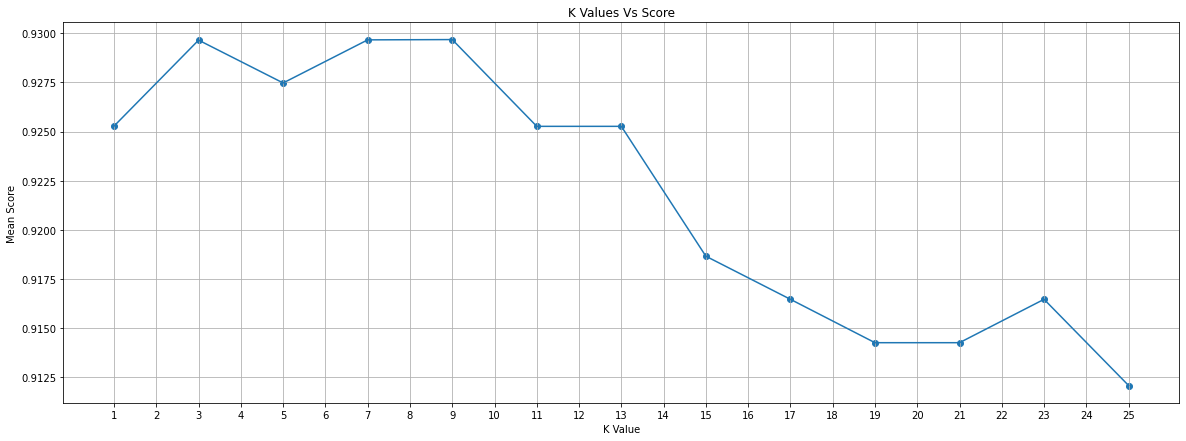

In [7]:
# Plotting the graph to find the best possible value of K
plt.figure(figsize = (20,7))
plt.plot(range(1,26,2),y_axis)
plt.scatter(range(1,26,2),y_axis)
plt.xticks(range(1,26,1))
plt.grid()
plt.xlabel('K Value')
plt.ylabel('Mean Score')
plt.title('K Values Vs Score')
plt.show()

## Implementation of Own KNN Classifier

In [8]:
# Implementation of KNN
from collections import Counter
def train(X_train, Y_train):
    return

def predict_single(X_train, Y_train, x, k):
    distances = []
    for i in range(len(X_train)):
        distance = ((X_train[i,:] - x)**2).sum()
        distances.append([distance, i])
    distances.sort()
    targets = [Y_train[distances[i][1]] for i in range(k)]
    return Counter(targets).most_common(1)[0][0]
    

def predict(X_train, Y_train, X_test, k):
    y_pred = []
    for x in X_test:
        y_pred.append(predict_single(X_train, Y_train, x, k))
    return y_pred

In [9]:
# Prediction using own implementation of KNeighborsClassifier
Y_pred = predict(X_train, Y_train, X_test, 7)
accuracy_score(Y_test, Y_pred)

0.9473684210526315

## Understanding Cross Validation (Not Related to KNN in specific)

In [10]:
# Understanding cross_validation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

In [11]:
iris = datasets.load_iris()

In [12]:
clf = LinearRegression()
# scores are 0 because the 1/3 of data is of class 1, next of class 3 and next of class 3, hence the data used in testing doesn't
# have any test data
cross_val_score(clf, iris.data, iris.target, cv = KFold(n_splits = 3))

array([0., 0., 0.])

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(iris.data, iris.target, random_state = 0)
clf = LinearRegression()
cross_val_score(clf,xtrain,ytrain)

array([0.82366898, 0.93597338, 0.97863873, 0.95503595, 0.89744499])